### Need to change cells:
* Calculate factors
* Calculating Factor's Values
* Plotting Prices and Factor's values

In [6]:
import pandas as pd
import os
import time
import patoolib
import gzip
import shutil
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [295]:
patoolib.extract_archive(r"L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\EURUSD.pkl.gz", 
                         outdir=r"L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\\")

patool: Extracting L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\EURUSD.pkl.gz ...
patool: running "C:\Program Files\7-Zip\7z.EXE" e -oL:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\\ -- L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\EURUSD.pkl.gz


PatoolError: Command `['C:\\Program Files\\7-Zip\\7z.EXE', 'e', '-oL:\\Raw_1_sec_Bar_Data\\FX\\EURUSD\\Pickle\\\\', '--', 'L:\\Raw_1_sec_Bar_Data\\FX\\EURUSD\\Pickle\\EURUSD.pkl.gz']' returned non-zero exit status 255

In [340]:
df = pd.read_pickle(r"L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\EURUSD.pkl")
analyzed_df = df["2018-02"]

### Inspecting one day

In [286]:
analyzed_df["2018-02-23 09:06:58":"2018-02-23 09:07:02"]

,Open,High,Low,Close,Trading_date_Date,Trading_date_Actual_Time,Trading_date_Actual_DateTime,Trading_date_Sequential_Time,Trading_date_Sequential_DateTime,Trading_date_Sequential_#_Secs
DateTime_UTC,,,,,,,,,,
2018-02-23 09:06:58,1.231575,1.231575,1.231575,1.231575,NaN,09:06:58,nan,10:51:58,nan,39119
2018-02-23 09:06:59,1.231575,1.231575,1.231525,1.231525,NaN,09:06:59,nan,10:51:59,nan,39120
2018-02-23 09:07:00,1.231525,1.231575,1.231525,1.231575,NaN,09:07:00,nan,10:52:00,nan,39121
2018-02-23 09:07:01,1.231575,1.231575,1.231525,1.231525,NaN,09:07:01,nan,10:52:01,nan,39122
2018-02-23 09:07:02,1.231525,1.231575,1.231525,1.231575,NaN,09:07:02,nan,10:52:02,nan,39123


In [297]:
df["Trading_date_Actual_DateTime"].value_counts()

nan     15897600
Name: Trading_date_Actual_DateTime, dtype: int64

## Selecting Date and Size

In [298]:
class Trade_Size:
    size = 20000
    
trading_date = "2018-03"

start_date = "2018-03"
end_date = "2018-08"

analyzed_df = df[trading_date]
# analyzed_df = df.loc[start_date:end_date,:]
analyzed_df.head()

,Open,High,Low,Close,Trading_date_Date,Trading_date_Actual_Time,Trading_date_Actual_DateTime,Trading_date_Sequential_Time,Trading_date_Sequential_DateTime,Trading_date_Sequential_#_Secs
DateTime_UTC,,,,,,,,,,
2018-03-01 00:00:00,1.219175,1.219175,1.219150,1.219175,NaN,00:00:00,nan,01:45:00,nan,6301
2018-03-01 00:00:01,1.219175,1.219175,1.219175,1.219175,NaN,00:00:01,nan,01:45:01,nan,6302
2018-03-01 00:00:02,1.219175,1.219175,1.219100,1.219100,NaN,00:00:02,nan,01:45:02,nan,6303
2018-03-01 00:00:03,1.219100,1.219125,1.219100,1.219125,NaN,00:00:03,nan,01:45:03,nan,6304
2018-03-01 00:00:04,1.219125,1.219125,1.219125,1.219125,NaN,00:00:04,nan,01:45:04,nan,6305


### Resampling into 1 Minute bars

In [299]:
min_1_low = analyzed_df.loc[:,"Low"].resample("T").apply(np.min)
min_1_high = analyzed_df.loc[:,"High"].resample("T").apply(np.max)
min_1_open = analyzed_df.loc[:,"Open"].resample("T").first()
min_1_close = analyzed_df.loc[:,"Close"].resample("T").last()
min_1_Trading_date_Actual_Time = analyzed_df.loc[:,"Trading_date_Actual_Time"].resample("T").first()
min_1_Trading_date_Sequential_Time = analyzed_df.loc[:,"Trading_date_Sequential_Time"].resample("T").first()

min_1_analyzed_df = pd.DataFrame.from_dict({"Open":min_1_open,"High":min_1_high,"Low":min_1_low,"Close":min_1_close,
                                        "Trading_date_Actual_Time":min_1_Trading_date_Actual_Time,
                                        "Trading_date_Sequential_Time":min_1_Trading_date_Sequential_Time})

min_1_analyzed_df.head()

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time
DateTime_UTC,,,,,,
2018-03-01 00:00:00,1.219175,1.219175,1.219050,1.219125,00:00:00,01:45:00
2018-03-01 00:01:00,1.219125,1.219125,1.219075,1.219125,00:01:00,01:46:00
2018-03-01 00:02:00,1.219125,1.219175,1.219125,1.219175,00:02:00,01:47:00
2018-03-01 00:03:00,1.219175,1.219225,1.219175,1.219225,00:03:00,01:48:00
2018-03-01 00:04:00,1.219225,1.219225,1.219175,1.219175,00:04:00,01:49:00


### Calculate factors

In [301]:
min_1_analyzed_df["Middle_Band"] = min_1_analyzed_df["Close"].rolling(20).mean()
min_1_analyzed_df["Upper_Band"] = min_1_analyzed_df["Middle_Band"] + (min_1_analyzed_df["Close"].rolling(20).std()*2)
min_1_analyzed_df["Lower_Band"] = min_1_analyzed_df["Middle_Band"] - (min_1_analyzed_df["Close"].rolling(20).std()*2)
min_1_analyzed_df["Prev_Lower_Band"] = min_1_analyzed_df["Lower_Band"].shift(1)
min_1_analyzed_df["Prev_Upper_Band"] = min_1_analyzed_df["Upper_Band"].shift(1)
min_1_analyzed_df["Is_Prev_Cndl_Up"] = ((min_1_analyzed_df["Close"].shift(1) - min_1_analyzed_df["Open"].shift(1)) >= 0)
min_1_analyzed_df["Five_per_std"] = min_1_analyzed_df["Close"].rolling(5).std()
min_1_analyzed_df["Prev_High"] = min_1_analyzed_df["High"].shift(1)
min_1_analyzed_df["Prev_Low"] = min_1_analyzed_df["Low"].shift(1)

# min_1_analyzed_df["SMA10_vs_SMA20"] = min_1_analyzed_df["SMA10"] - min_1_analyzed_df["SMA20"]
# min_1_analyzed_df["SMA10_vs_SMA20_Shifted"] = min_1_analyzed_df["SMA10_vs_SMA20"].shift(1)
min_1_analyzed_df.head(25)

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,Middle_Band,Upper_Band,Lower_Band,Lower_Band_Shifted,Upper_Band_Shifted,Is_Prev_Cndl_Up,Five_per_std,Prev_High
DateTime_UTC,,,,,,,,,,,,,,
2018-03-01 00:00:00,1.219175,1.219175,1.219050,1.219125,00:00:00,01:45:00,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
2018-03-01 00:01:00,1.219125,1.219125,1.219075,1.219125,00:01:00,01:46:00,NaN,NaN,NaN,NaN,NaN,False,NaN,1.219175
2018-03-01 00:02:00,1.219125,1.219175,1.219125,1.219175,00:02:00,01:47:00,NaN,NaN,NaN,NaN,NaN,True,NaN,1.219125
2018-03-01 00:03:00,1.219175,1.219225,1.219175,1.219225,00:03:00,01:48:00,NaN,NaN,NaN,NaN,NaN,True,NaN,1.219175
2018-03-01 00:04:00,1.219225,1.219225,1.219175,1.219175,00:04:00,01:49:00,NaN,NaN,NaN,NaN,NaN,True,0.000042,1.219225
2018-03-01 00:05:00,1.219175,1.219175,1.219075,1.219125,00:05:00,01:50:00,NaN,NaN,NaN,NaN,NaN,False,0.000042,1.219225
2018-03-01 00:06:00,1.219125,1.219125,1.219075,1.219125,00:06:00,01:51:00,NaN,NaN,NaN,NaN,NaN,False,0.000042,1.219175
2018-03-01 00:07:00,1.219125,1.219300,1.219125,1.219275,00:07:00,01:52:00,NaN,NaN,NaN,NaN,NaN,True,0.000065,1.219125
2018-03-01 00:08:00,1.219275,1.219275,1.219275,1.219275,00:08:00,01:53:00,NaN,NaN,NaN,NaN,NaN,True,0.000076,1.219300


In [302]:
min_1_analyzed_df.dropna(inplace=True)
min_1_analyzed_df.head(35)

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,Middle_Band,Upper_Band,Lower_Band,Lower_Band_Shifted,Upper_Band_Shifted,Is_Prev_Cndl_Up,Five_per_std,Prev_High
DateTime_UTC,,,,,,,,,,,,,,
2018-03-01 00:20:00,1.218725,1.218875,1.218675,1.218825,00:20:00,02:05:00,1.219172,1.219512,1.218833,1.218889,1.219486,False,0.000182,1.218975
2018-03-01 00:21:00,1.218825,1.218950,1.218775,1.218825,00:21:00,02:06:00,1.219157,1.219531,1.218784,1.218833,1.219512,True,0.000139,1.218875
2018-03-01 00:22:00,1.218825,1.218950,1.218775,1.218775,00:22:00,02:07:00,1.219137,1.219548,1.218727,1.218784,1.219531,True,0.000094,1.218950
2018-03-01 00:23:00,1.218775,1.218775,1.218675,1.218675,00:23:00,02:08:00,1.219110,1.219567,1.218653,1.218727,1.219548,False,0.000065,1.218950
2018-03-01 00:24:00,1.218675,1.218675,1.218525,1.218575,00:24:00,02:09:00,1.219080,1.219594,1.218566,1.218653,1.219567,False,0.000108,1.218775
2018-03-01 00:25:00,1.218575,1.218575,1.218525,1.218525,00:25:00,02:10:00,1.219050,1.219620,1.218480,1.218566,1.219594,False,0.000127,1.218675
2018-03-01 00:26:00,1.218525,1.218675,1.218425,1.218650,00:26:00,02:11:00,1.219026,1.219622,1.218431,1.218480,1.219620,False,0.000096,1.218575
2018-03-01 00:27:00,1.218650,1.218650,1.218525,1.218525,00:27:00,02:12:00,1.218989,1.219612,1.218365,1.218431,1.219622,True,0.000070,1.218675
2018-03-01 00:28:00,1.218525,1.218525,1.218375,1.218425,00:28:00,02:13:00,1.218946,1.219603,1.218290,1.218365,1.219612,False,0.000082,1.218650


### Filter for including only certain times of the day

In [309]:
filter_days = []
filter_hours = range(7,17)
filter_mins = []
filter_secs = []

min_1_analyzed_df = min_1_analyzed_df[min_1_analyzed_df.index.hour.isin(filter_hours)]
min_1_analyzed_df.shape

(13200, 14)

In [303]:
min_1_analyzed_df.tail(100)

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,Middle_Band,Upper_Band,Lower_Band,Lower_Band_Shifted,Upper_Band_Shifted,Is_Prev_Cndl_Up,Five_per_std,Prev_High
DateTime_UTC,,,,,,,,,,,,,,
2018-03-30 19:20:00,1.231950,1.231975,1.231925,1.231975,19:20:00,22:05:00,1.232071,1.232423,1.231719,1.231724,1.232451,True,0.000014,1.231975
2018-03-30 19:21:00,1.231975,1.231975,1.231950,1.231950,19:21:00,22:06:00,1.232044,1.232336,1.231752,1.231719,1.232423,True,0.000014,1.231975
2018-03-30 19:22:00,1.231950,1.232575,1.231950,1.232475,19:22:00,22:07:00,1.232061,1.232410,1.231712,1.231752,1.232336,False,0.000232,1.231975
2018-03-30 19:23:00,1.232475,1.232575,1.232025,1.232025,19:23:00,22:08:00,1.232046,1.232372,1.231720,1.231712,1.232410,True,0.000226,1.232575
2018-03-30 19:24:00,1.232025,1.232350,1.232025,1.232325,19:24:00,22:09:00,1.232047,1.232378,1.231717,1.231720,1.232372,False,0.000236,1.232575
2018-03-30 19:25:00,1.232325,1.232325,1.232325,1.232325,19:25:00,22:10:00,1.232047,1.232378,1.231717,1.231717,1.232378,True,0.000222,1.232350
2018-03-30 19:26:00,1.232325,1.232500,1.232150,1.232225,19:26:00,22:11:00,1.232042,1.232358,1.231727,1.231717,1.232378,True,0.000166,1.232325
2018-03-30 19:27:00,1.232225,1.232350,1.231850,1.232075,19:27:00,22:12:00,1.232049,1.232361,1.231736,1.231727,1.232358,False,0.000140,1.232500
2018-03-30 19:28:00,1.232075,1.232150,1.232075,1.232100,19:28:00,22:13:00,1.232055,1.232366,1.231744,1.231736,1.232361,False,0.000119,1.232350


# Testing factor

## Calculating Factor's Values

#### Entry:
1. lower BB needs to start declining
2. AND the upper BB needs to start rising (or be rising)
3. AND the previous candle was in the direction of the trade (e.g. higher)
4. AND the current price gets above previous candle's high
5. AND the 5 period standard deviation of CLOSE needs to be under or equal 0.00011

#### Stop/Exit:
Test each of these:
 1. stop below the midle band (SMA) AND below the low of previous candle
 2. stop below the midle band (SMA)
 3. stop below the low of previous candle
 4. stop below 50% between lower band and middle band (SMA) - for long
 
#### To make the strategy more profitable:
 1. Run it only during more volatile times of the day
 2. OR run it only if historical volatility (measured via std dev) is over certain value

In [224]:
class pos_open:    
    
    is_position_open = False

    @classmethod
    def position_opened(cls, opened):
        if opened == True:
            cls.is_position_open = True
        else:
            cls.is_position_open = False

def enter_factor(row):
    if (row.Lower_Band <= row.Prev_Lower_Band) \
    & (row.Upper_Band > row.Prev_Upper_Band) \
    & (row.Is_Prev_Cndl_Up = True) \
    & (row.High > row.Prev_High) \ 
    & (row.Five_per_std <= 0.00011) \
    & (pos_open.is_position_open == False):
        entry = True
    else:
        entry = False
    return entry

def take_profit(row):
    if (row.Low < Middle_Band) \
    & (pos_open.is_position_open == True):
        take_prft = True
    else:
        take_prft = False
    return take_prft

# def stop_loss(row):
#     if (row.Close_vs_SMA20 < 0) & (pos_open.is_position_open == True):
#         stop_lss = True
#     else:
#         stop_lss = False
#     return stop_lss

def action_func(row):

    #rtn = str(pos_open.is_position_open)
    
    # Enter position
    if enter_factor(row):
        pos_open.position_opened(opened=True)
        #rtn = rtn + "_" + str(pos_open.is_position_open)
        return "Entered" #+ "_" + rtn
        #print("3")
        
    # Check if exit criteria has been met
    elif take_profit(row):
        pos_open.position_opened(opened=False)
        #rtn = rtn + "_" + str(pos_open.is_position_open)
        return "Took Profit" #+ "_" + rtn
    
    # Check if exit criteria has been met
#     elif stop_loss(row):
#         pos_open.position_opened(opened=False)
#         return "Stopped Out"
        
    else:
        #rtn = "else" 
        return "Waiting" #+ "_" + rtn 

min_1_analyzed_df["Action"] = min_1_analyzed_df.apply(action_func, axis=1)

min_1_analyzed_df.head(50)

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,SMA10,SMA20,Close_vs_SMA20,SMA10_vs_SMA20,SMA10_vs_SMA20_Shifted,Action
DateTime_UTC,,,,,,,,,,,,
2018-03-01 06:00:00,1.219250,1.219275,1.219075,1.219075,06:00:00,07:45:00,1.219311,1.219330,0.000255,-0.000020,-0.000011,Waiting
2018-03-01 06:01:00,1.219075,1.219225,1.218975,1.219075,06:01:00,07:46:00,1.219303,1.219328,0.000253,-0.000025,-0.000020,Waiting
2018-03-01 06:02:00,1.219075,1.219125,1.218975,1.219100,06:02:00,07:47:00,1.219296,1.219325,0.000225,-0.000029,-0.000025,Waiting
2018-03-01 06:03:00,1.219100,1.219250,1.219025,1.219025,06:03:00,07:48:00,1.219288,1.219322,0.000297,-0.000034,-0.000029,Waiting
2018-03-01 06:04:00,1.219025,1.219125,1.219025,1.219075,06:04:00,07:49:00,1.219281,1.219320,0.000245,-0.000039,-0.000034,Waiting
2018-03-01 06:05:00,1.219075,1.219075,1.218875,1.218875,06:05:00,07:50:00,1.219269,1.219315,0.000440,-0.000046,-0.000039,Waiting
2018-03-01 06:06:00,1.218875,1.218925,1.218875,1.218875,06:06:00,07:51:00,1.219258,1.219312,0.000437,-0.000053,-0.000046,Waiting
2018-03-01 06:07:00,1.218875,1.218925,1.218875,1.218875,06:07:00,07:52:00,1.219246,1.219308,0.000433,-0.000063,-0.000053,Waiting
2018-03-01 06:08:00,1.218875,1.218925,1.218875,1.218875,06:08:00,07:53:00,1.219232,1.219305,0.000430,-0.000072,-0.000063,Waiting


## Plotting Prices and Factor's values

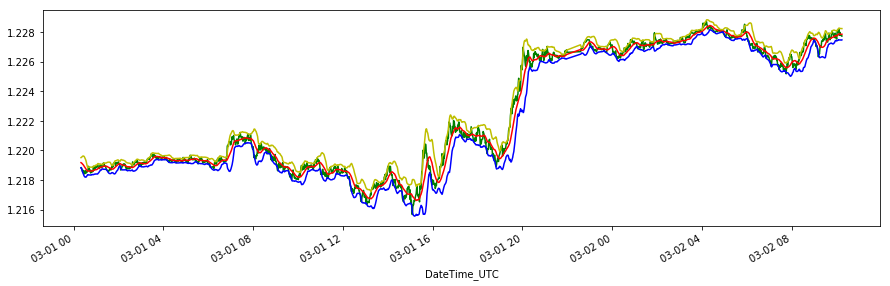

In [308]:
#%matplotlib inline

fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot(3,1,1)
min_1_analyzed_df["Close"].head(2000).plot(ax=ax1, color="g")
ax2 = plt.subplot(3,1,1)
min_1_analyzed_df["Middle_Band"].head(2000).plot(ax=ax1, color="r")
ax3 = plt.subplot(3,1,1)
min_1_analyzed_df["Upper_Band"].head(2000).plot(ax=ax1, color="y")
min_1_analyzed_df["Lower_Band"].head(2000).plot(ax=ax1, color="b")
plt.show()

## Calculating Factor's Profit and Loss

In [226]:
class Pos_Open:
    is_position_open = False
    @classmethod
    def position_opened(cls, opened):
        if opened == True:
            cls.is_position_open = True
        else:
            cls.is_position_open = False
        
class Prft_lss_calc:
    entry_value = 0
    exit_value = 0
    prft_lss = 0
    
    def round_down(self, n):
        return (np.floor(n*100))/100
        
    @classmethod
    def add_to_pos(cls, price):
        cls.entry_value = price*Trade_Size.size
#     def close_pos(cls, price):
#         cls.current_position += -price*Trade_Size.size
    def prft_lss_cal(self, price):
        self.exit_value = -price*Trade_Size.size
        self.prft_lss = self.round_down(Prft_lss_calc.entry_value + self.exit_value)
        
        return self.prft_lss
        
def trd_price_and_prft(row):
    
    p_l_calc = Prft_lss_calc()
    
    if (row.Action == "Entered") & (Pos_Open.is_position_open == False):
        p_l_calc.add_to_pos(row.Low)
        Pos_Open.position_opened(True)
        return [row.Low,0]
    
    elif (row.Action == "Took Profit") & (Pos_Open.is_position_open == True):
#         Prft_lss_calc.close_pos(row.High)
        Pos_Open.position_opened(False)
        
        return [row.High,p_l_calc.prft_lss_cal(row.High)]
    
    else:
        return[np.NaN,0]

min_1_analyzed_df["Trade_Prc_and_Prft"] = min_1_analyzed_df.apply(trd_price_and_prft, axis=1)
min_1_analyzed_df["Trade_Prft_Lss"] = min_1_analyzed_df["Trade_Prc_and_Prft"].apply(lambda x: x[1])
min_1_analyzed_df.head(80)

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,SMA10,SMA20,Close_vs_SMA20,SMA10_vs_SMA20,SMA10_vs_SMA20_Shifted,Action,Trade_Prc_and_Prft,Trade_Prft_Lss
DateTime_UTC,,,,,,,,,,,,,,
2018-03-01 06:00:00,1.219250,1.219275,1.219075,1.219075,06:00:00,07:45:00,1.219311,1.219330,0.000255,-0.000020,-0.000011,Waiting,"[nan, 0]",0.0
2018-03-01 06:01:00,1.219075,1.219225,1.218975,1.219075,06:01:00,07:46:00,1.219303,1.219328,0.000253,-0.000025,-0.000020,Waiting,"[nan, 0]",0.0
2018-03-01 06:02:00,1.219075,1.219125,1.218975,1.219100,06:02:00,07:47:00,1.219296,1.219325,0.000225,-0.000029,-0.000025,Waiting,"[nan, 0]",0.0
2018-03-01 06:03:00,1.219100,1.219250,1.219025,1.219025,06:03:00,07:48:00,1.219288,1.219322,0.000297,-0.000034,-0.000029,Waiting,"[nan, 0]",0.0
2018-03-01 06:04:00,1.219025,1.219125,1.219025,1.219075,06:04:00,07:49:00,1.219281,1.219320,0.000245,-0.000039,-0.000034,Waiting,"[nan, 0]",0.0
2018-03-01 06:05:00,1.219075,1.219075,1.218875,1.218875,06:05:00,07:50:00,1.219269,1.219315,0.000440,-0.000046,-0.000039,Waiting,"[nan, 0]",0.0
2018-03-01 06:06:00,1.218875,1.218925,1.218875,1.218875,06:06:00,07:51:00,1.219258,1.219312,0.000437,-0.000053,-0.000046,Waiting,"[nan, 0]",0.0
2018-03-01 06:07:00,1.218875,1.218925,1.218875,1.218875,06:07:00,07:52:00,1.219246,1.219308,0.000433,-0.000063,-0.000053,Waiting,"[nan, 0]",0.0
2018-03-01 06:08:00,1.218875,1.218925,1.218875,1.218875,06:08:00,07:53:00,1.219232,1.219305,0.000430,-0.000072,-0.000063,Waiting,"[nan, 0]",0.0


## Result (P & L)

# of Trades: 36
Gross P&L: 428.47 (2.14235%)
Commission: 72
Slippage: 72.0
Net P&L: 284.47 (1.4223500000000002%)


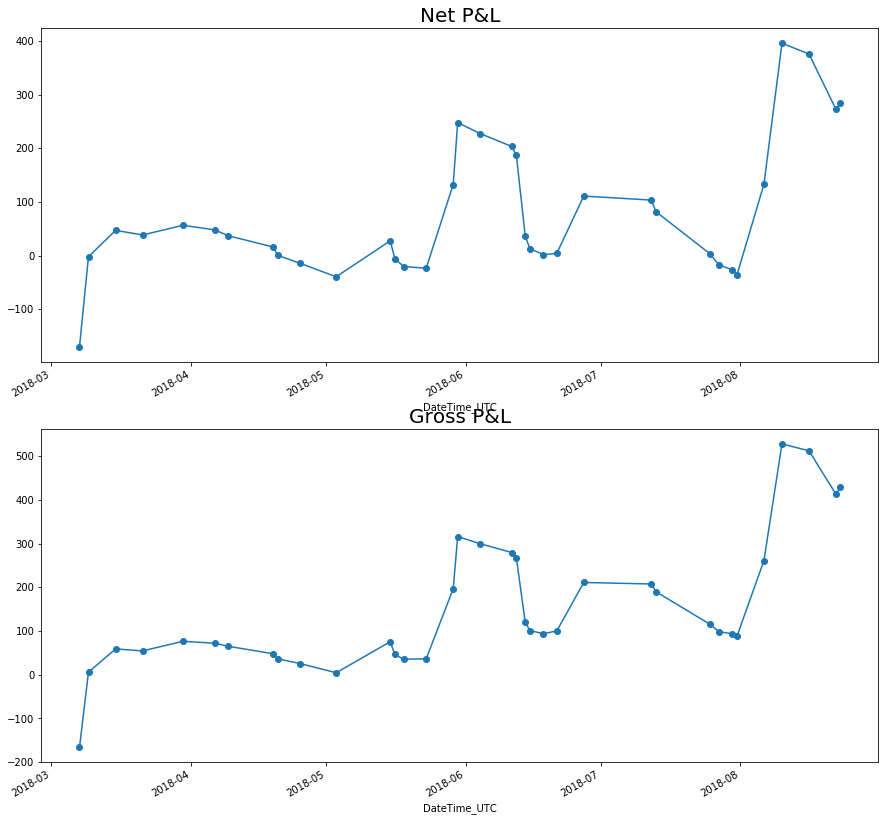

In [227]:
# Gross P&L:
gross_absolute_profit_loss = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"].sum()
gross_percent_profit_loss = (gross_absolute_profit_loss/Trade_Size.size)*100

# Commission:
commission = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"].count()*2

#Slippage:
slippage = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"].count()*(Trade_Size.size/10000)

# Net P&L:
net_absolute_profit_loss = gross_absolute_profit_loss - commission - slippage
net_percent_profit_loss = (net_absolute_profit_loss/Trade_Size.size)*100

# Number of trades:
num_of_trades = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"].count()

print("# of Trades: {}".format(num_of_trades))
print("Gross P&L: {} ({}%)".format(gross_absolute_profit_loss,gross_percent_profit_loss))
print("Commission: {}".format(commission))
print("Slippage: {}".format(slippage))
print("Net P&L: {} ({}%)".format(net_absolute_profit_loss,net_percent_profit_loss))

# Charting P&L:
pnl_chart_df = min_1_analyzed_df["Trade_Prft_Lss"].replace(0,np.NaN)
pnl_chart_df_cumsum = pnl_chart_df[pnl_chart_df < 1000000000].cumsum()
pnl_chart_df_less_comm_and_slip = pnl_chart_df - 2 - Trade_Size.size/10000
pnl_chart_df_less_comm_and_slip_cumsum = pnl_chart_df_less_comm_and_slip[pnl_chart_df_less_comm_and_slip < 1000000000].cumsum()

fig1 = plt.figure(figsize=(15,15))
ax4 = plt.subplot(2,1,1)
ax4.set_title("Net P&L", fontsize=20)
pnl_chart_df_less_comm_and_slip_cumsum.plot(ax=ax4, linestyle="-", marker="o")
ax5 = plt.subplot(2,1,2)
ax5.set_title("Gross P&L", fontsize=20)
pnl_chart_df_cumsum.plot(ax=ax5, linestyle="-", marker="o")
plt.show()
# ax2 = plt.subplot(3,1,1)
# min_1_analyzed_df["SMA10"].head(100).plot(ax=ax1, color="r")
# ax3 = plt.subplot(3,1,1)
# min_1_analyzed_df["SMA20"].head(100).plot(ax=ax1, color="y")